In [14]:
import heapq

def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def a_star(matrix, start, goal):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    open_set = [(0, start)]  # Priority queue (cost, position)
    closed_set = set()
    path_matrix = [[None for _ in range(len(matrix[0]))] for _ in range(len(matrix))]
    path_matrix[start[0]][start[1]] = []
    
    while open_set:
        cost, current = heapq.heappop(open_set)
        
        if current == goal:
            return path_matrix[current[0]][current[1]]
        
        closed_set.add(current)
        
        for dx, dy in directions:
            new_x, new_y = current[0] + dx, current[1] + dy
            new_pos = (new_x, new_y)
            
            if (
                0 <= new_x < len(matrix) and 
                0 <= new_y < len(matrix[0]) and 
                matrix[new_x][new_y] == 1 and 
                new_pos not in closed_set
            ):
                new_cost = cost + 1
                heapq.heappush(open_set, (new_cost + manhattan_distance(new_pos, goal), new_pos))
                if path_matrix[new_x][new_y] is None or len(path_matrix[new_x][new_y]) > len(path_matrix[current[0]][current[1]]) + 1:
                    path_matrix[new_x][new_y] = path_matrix[current[0]][current[1]] + [current]
    
    return None  # No path found

# Example input with 1 as movable fields and 2 as unmovable fields
matrix = [
    [1, 1, 1, 1],
    [1, 2, 1, 1],
    [1, 1, 2, 1]
]

start = (0, 0)
goals = [(2, 2), (2, 3)]

# Find paths using A* and store them in separate matrices
paths = []
for goal in goals:
    path = a_star(matrix, start, goal)
    paths.append(path)


for step in path + [goal]:
    matrix[step[0]][step[1]] = 3
    
    

# Print the path matrices
for idx, path in enumerate(path_matrices):
    print(f"Path to goal {goals[idx]}:", path)


Path to goal (2, 2): None
Path to goal (2, 3): [[1, 1, 6, 10], [1, 0, 10, 13], [6, 10, 0, 15]]


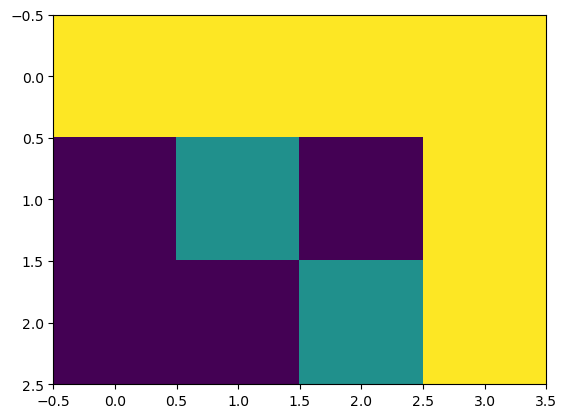

In [17]:
import matplotlib.pyplot as plt
plt.imshow(matrix)

In [5]:
%%timeit
path_matrices = []
for goal in goals:
    path = a_star(matrix, start, goal)
    path_matrices.append(path)
    

48 µs ± 2.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
